Milestone 5 - Model Training (enhancement)

Task 3: Train and tune other models

This task will focus on steps 3 to 5 of the workflow mentioned in the first task of this milestone. There are many different models that you can use to train your model. You can use KNN, decision trees, random forests... You have to tune them before making a decision, and not the other way around. So first, tune all of them, and then check which one performs better on the testing set. Remember not to overfit! Some models, like decision tree, are prone to overfitting, so even if they perform very well on the training set, make sure that it can also perform well on the testing set. If that's the case, you can add different ways of regularisation. Once you picked the model, save the model as model.joblib.

In [1]:
import re
import pandas as pd
import os
import numpy as np
from csv import reader
import plotly.express as px
import missingno as msno
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
# READ IN cleaned_dataset.csv
full_pd = pd.read_csv("cleaned_dataset_b.csv")
full_pd

,League,Season,Round,Home_Team,Away_Team,Elo_home,Elo_away,HOMETEAM_HOME_GOAL_SO_FAR,HOMETEAM_AWAY_GOAL_SO_FAR,AWAYTEAM_HOME_GOAL_SO_FAR,AWAYTEAM_AWAY_GOAL_SO_FAR,HOME_LASTEST_GOAL_DIFF,AWAY_LASTEST_GOAL_DIFF,Result
0,championship,2021,4,Coventry City,AFC Bournemouth,46.0,62.0,3,2,4,2,0,2,0
1,championship,2021,4,Norwich City,Derby County,62.0,60.0,2,2,0,6,0,-7,0
2,championship,2021,4,Blackburn Rovers,Cardiff City,58.0,60.0,5,0,1,4,8,-1,0
3,championship,2021,4,Luton Town,Wycombe Wanderers,51.0,41.0,2,1,0,3,1,-8,1
4,championship,2021,4,Middlesbrough,Barnsley,61.0,46.0,1,1,0,1,-1,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111647,serie_b,1997,38,Pescara,Padova,59.0,54.0,32,15,22,15,5,-3,0
111648,serie_b,1997,38,Genoa,Palermo FC,61.0,58.0,33,12,24,24,2,-1,1
111649,serie_b,1997,38,Torino,Ravenna FC,63.0,54.0,27,23,22,18,-2,-2,0
111650,serie_b,1997,38,Salernitana,Reggina,52.0,52.0,20,7,23,18,-2,3,0


In [3]:
# Create functions to filter different league
def getLeagueData(data, league, season=None):
    if season is None:
        league_pd =  data[(data["League"]==league)]
    else:
        league_pd =  data[(data["League"]==league) & (data["Season"]==season)]
    return league_pd

In [4]:
def get_ELO_diff(record):
    hscore = record['Elo_home']
    ascore = record['Elo_away']
    return (hscore - ascore)

In [5]:
def get_recent_goal_diff_diff(record):
    hscore = record['HOME_LASTEST_GOAL_DIFF']
    ascore = record['AWAY_LASTEST_GOAL_DIFF']
    return hscore - ascore

In [6]:
def get_home_away_total_goal_diff(record):
    hgoal = record['HOMETEAM_HOME_GOAL_SO_FAR']
    agoal = record['AWAYTEAM_AWAY_GOAL_SO_FAR']
    return hgoal - agoal

In [10]:
def tryModels(X, y):
    test_size = 0.3
    seed = 42
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    # Model creation
    print("LogisticRegression")
    model = LogisticRegression() 
    model.fit(X_train, Y_train)
    result = model.score(X_train, Y_train) 
    print("Accuracy for train: %.3f%%" % (result*100.0))
    result = model.score(X_test, Y_test) 
    print("Accuracy for test: %.3f%%" % (result*100.0))
    print()

    # KNN 
    print("KNN")
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train, Y_train)
    result = knn.score(X_train, Y_train) 
    print("Accuracy for train: %.3f%%" % (result*100.0))
    result = knn.score(X_test, Y_test) 
    print("Accuracy for test: %.3f%%" % (result*100.0))
    print()

    # decision trees  
    print("decision trees")
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    result = clf.score(X_train, Y_train) 
    print("Accuracy for train: %.3f%%" % (result*100.0))
    result = clf.score(X_test, Y_test) 
    print("Accuracy for test: %.3f%%" % (result*100.0))
    print()

    # random forests
    print("random forests")
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    result = model.score(X_train, Y_train) 
    print("Accuracy for train: %.3f%%" % (result*100.0))
    result = model.score(X_test, Y_test) 
    print("Accuracy for test: %.3f%%" % (result*100.0))
    print()

In [15]:


def evaluateModels(X, y):
    seed = 7
    test_size = 0.3
    seed = 42
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    # Spot-Check Algorithms
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) 
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))

    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # Compare Algorithms
    fig = plt.figure() 
    fig.suptitle('Algorithm Comparison') 
    ax = fig.add_subplot(111) 
    plt.boxplot(results) 
    ax.set_xticklabels(names) 
    plt.show()



championship
-------------------------------------
LR: 0.555128 (0.020811)
LDA: 0.553526 (0.020475)
KNN: 0.509936 (0.012451)
CART: 0.504487 (0.024711)
NB: 0.560577 (0.018932)
SVM: 0.556410 (0.010356)
DT: 0.505449 (0.024370)
RF: 0.496474 (0.032098)


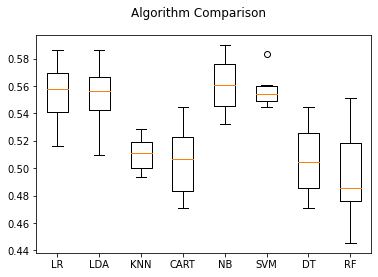



primeira_liga
-------------------------------------
LR: 0.640643 (0.021694)
LDA: 0.640467 (0.021513)
KNN: 0.591156 (0.024872)
CART: 0.580978 (0.016282)
NB: 0.626259 (0.026109)
SVM: 0.633274 (0.022883)
DT: 0.581153 (0.016250)
RF: 0.592382 (0.015282)


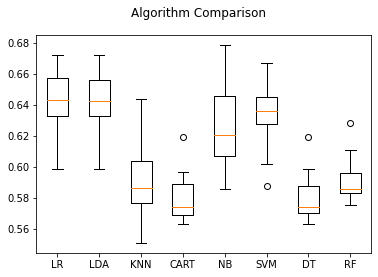



ligue_1
-------------------------------------
LR: 0.605558 (0.018045)
LDA: 0.605420 (0.017614)
KNN: 0.545272 (0.015204)
CART: 0.545689 (0.014356)
NB: 0.591177 (0.020032)
SVM: 0.605834 (0.020327)
DT: 0.545689 (0.014594)
RF: 0.548180 (0.014685)


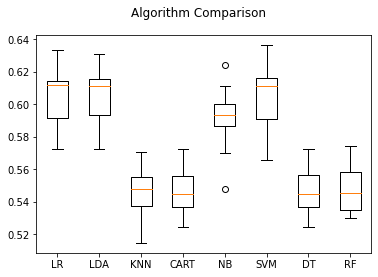



segunda_division
-------------------------------------
LR: 0.566733 (0.012762)
LDA: 0.567722 (0.012790)
KNN: 0.527956 (0.015431)
CART: 0.545973 (0.009945)
NB: 0.561791 (0.011175)
SVM: 0.565634 (0.013359)
DT: 0.545863 (0.009627)
RF: 0.541140 (0.007635)


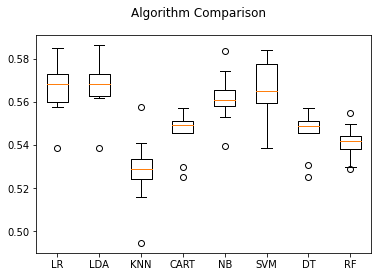



2_liga
-------------------------------------
LR: 0.568249 (0.016901)
LDA: 0.568732 (0.016266)
KNN: 0.537187 (0.016967)
CART: 0.543140 (0.019652)
NB: 0.565193 (0.021802)
SVM: 0.571145 (0.020554)
DT: 0.542979 (0.019701)
RF: 0.540076 (0.019480)


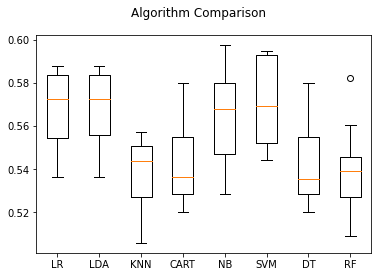



serie_a
-------------------------------------
LR: 0.643368 (0.021442)
LDA: 0.642370 (0.021224)
KNN: 0.601930 (0.018132)
CART: 0.594941 (0.021224)
NB: 0.626559 (0.014494)
SVM: 0.640207 (0.021751)
DT: 0.595107 (0.021559)
RF: 0.595606 (0.019150)


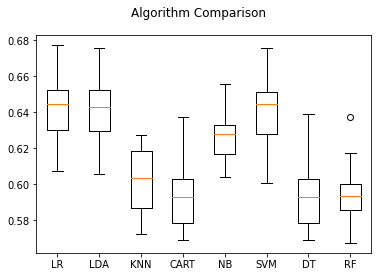



bundesliga
-------------------------------------
LR: 0.605176 (0.019905)
LDA: 0.605176 (0.019686)
KNN: 0.555018 (0.017568)
CART: 0.567639 (0.024046)
NB: 0.593354 (0.022967)
SVM: 0.602778 (0.017258)
DT: 0.568118 (0.023972)
RF: 0.563169 (0.023862)


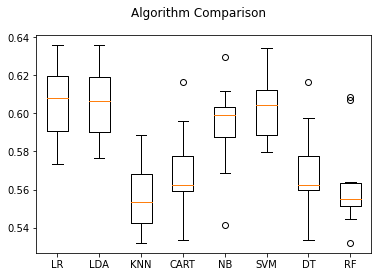



primera_division
-------------------------------------
LR: 0.612192 (0.013300)
LDA: 0.612065 (0.013289)
KNN: 0.576083 (0.012776)
CART: 0.571517 (0.016265)
NB: 0.597116 (0.016291)
SVM: 0.612444 (0.012215)
DT: 0.571517 (0.016261)
RF: 0.567465 (0.012062)


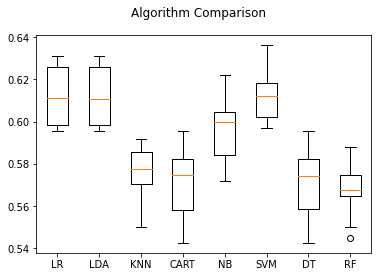



ligue_2
-------------------------------------
LR: 0.569710 (0.013368)
LDA: 0.570053 (0.014038)
KNN: 0.525692 (0.019721)
CART: 0.550108 (0.006441)
NB: 0.567303 (0.020989)
SVM: 0.571257 (0.015598)
DT: 0.550108 (0.006487)
RF: 0.545984 (0.010902)


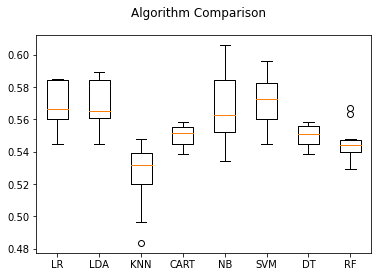



premier_league
-------------------------------------
LR: 0.634349 (0.018277)
LDA: 0.634474 (0.017897)
KNN: 0.579691 (0.020997)
CART: 0.578310 (0.012236)
NB: 0.619336 (0.017883)
SVM: 0.631601 (0.019095)
DT: 0.578685 (0.012528)
RF: 0.578810 (0.011962)


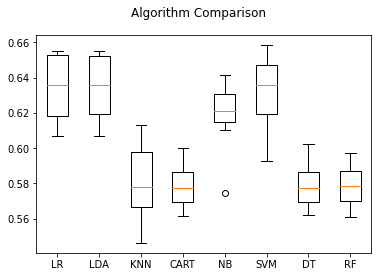



eredivisie
-------------------------------------
LR: 0.662144 (0.016102)
LDA: 0.662144 (0.016102)
KNN: 0.607873 (0.020246)
CART: 0.605695 (0.014721)
NB: 0.648074 (0.014650)
SVM: 0.660134 (0.014103)
DT: 0.605193 (0.014927)
RF: 0.610050 (0.017771)


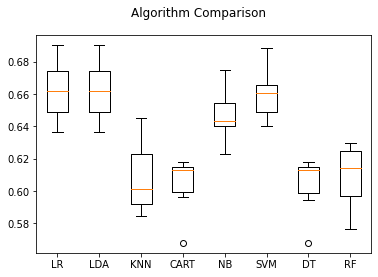



segunda_liga
-------------------------------------
LR: 0.894583 (0.066355)
LDA: 0.901250 (0.066564)
KNN: 0.927917 (0.079496)
CART: 0.947083 (0.049793)
NB: 0.921250 (0.091789)
SVM: 0.947500 (0.057015)
DT: 0.947083 (0.049793)
RF: 0.953750 (0.042510)


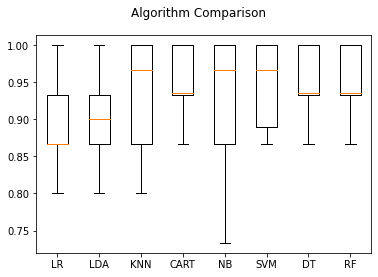



serie_b
-------------------------------------
LR: 0.567725 (0.027730)
LDA: 0.568173 (0.027879)
KNN: 0.524821 (0.015330)
CART: 0.520031 (0.012419)
NB: 0.563390 (0.021619)
SVM: 0.569221 (0.027264)
DT: 0.519732 (0.012679)
RF: 0.517937 (0.013822)


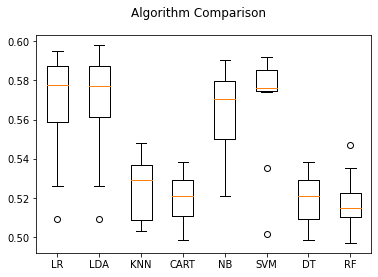

In [16]:
# load all directory as league name list
dir = "./Results"
leagues = [name for name in os.listdir(dir) if os.path.isdir(os.path.join(dir, name))]

# loop to open csv
result_with_goal_sofar_pd = pd.DataFrame()
for league in leagues:
    model_pd = getLeagueData(full_pd, league)
    model_pd = model_pd.dropna()

    if (model_pd.shape[0]==0):
        continue

    elo_diff_pd = model_pd.apply(get_ELO_diff, axis=1)
    model_pd.drop('Elo_home', inplace=True, axis=1)
    model_pd.drop('Elo_away', inplace=True, axis=1)
    model_pd.insert(loc=5, column="ELO_DIFF", value=elo_diff_pd.astype('Int64')) 
    
    recent_perf_diff_pd = model_pd.apply(get_recent_goal_diff_diff, axis=1)
    model_pd.drop('HOME_LASTEST_GOAL_DIFF', inplace=True, axis=1)
    model_pd.drop('AWAY_LASTEST_GOAL_DIFF', inplace=True, axis=1)
    model_pd.insert(loc=6, column="RECENT_PERF_DIFF", value=recent_perf_diff_pd.astype('Int64')) 

    goal_diff_pd = model_pd.apply(get_home_away_total_goal_diff, axis=1)
    model_pd.drop('HOMETEAM_HOME_GOAL_SO_FAR', inplace=True, axis=1)
    model_pd.drop('HOMETEAM_AWAY_GOAL_SO_FAR', inplace=True, axis=1)
    model_pd.drop('AWAYTEAM_HOME_GOAL_SO_FAR', inplace=True, axis=1)
    model_pd.drop('AWAYTEAM_AWAY_GOAL_SO_FAR', inplace=True, axis=1)
    model_pd.insert(loc=7, column="HOME_AWAY_GOAL_DIFF", value=recent_perf_diff_pd.astype('Int64')) 

    # delete no value column
    model_pd.drop('League', inplace=True, axis=1)
    model_pd.drop('Season', inplace=True, axis=1)
    model_pd.drop('Round', inplace=True, axis=1)
    model_pd.drop('Home_Team', inplace=True, axis=1)
    model_pd.drop('Away_Team', inplace=True, axis=1)

    array = model_pd.values
    X = array[:,0:(array.shape[1]-1)].astype('int')
    y = array[:,(array.shape[1]-1)].astype('int')

    # Scaler
    scaler = MinMaxScaler(feature_range=(0, 8))
    rescaledX = scaler.fit_transform(X)

    # summarize transformed data
    set_printoptions(precision=3)

    # Or Standardize
    #scaler = StandardScaler().fit(X)
    #rescaledX = scaler.transform(X)

    print()
    print()
    print(league)
    print("-------------------------------------")
    evaluateModels(rescaledX, y)
    

In [58]:
# try to add regularisation
model_pd = getLeagueData(full_pd, "serie_b", 2011)
model_pd

,League,Season,Round,Home_Team,Away_Team,Elo_home,Elo_away,HOMETEAM_HOME_GOAL_SO_FAR,HOMETEAM_AWAY_GOAL_SO_FAR,AWAYTEAM_HOME_GOAL_SO_FAR,AWAYTEAM_AWAY_GOAL_SO_FAR,HOME_LASTEST_GOAL_DIFF,AWAY_LASTEST_GOAL_DIFF,Result
103305,serie_b,2011,4,Padova,Reggina,53.0,58.0,1,1,2,0,-1,1,1
103306,serie_b,2011,4,Vicenza,Livorno,57.0,62.0,4,1,1,5,2,-1,0
103307,serie_b,2011,4,Siena,Cittadella,64.0,52.0,2,1,2,3,1,-3,1
103308,serie_b,2011,4,Sassuolo,Torino,54.0,59.0,1,1,2,3,3,-2,0
103309,serie_b,2011,4,Piacenza,Ascoli,59.0,60.0,1,1,3,1,-3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103729,serie_b,2011,42,Cittadella,Pescara,52.0,45.0,26,24,24,19,0,-2,1
103730,serie_b,2011,42,Varese,Piacenza,46.0,58.0,32,10,32,32,-2,-2,1
103731,serie_b,2011,42,Sassuolo,Reggina,54.0,58.0,24,20,21,11,-1,1,1
103732,serie_b,2011,42,AlbinoLeffe,Siena,55.0,64.0,31,30,45,14,-1,4,1


In [59]:
model_pd = model_pd.dropna()

elo_diff_pd = model_pd.apply(get_ELO_diff, axis=1)
model_pd.drop('Elo_home', inplace=True, axis=1)
model_pd.drop('Elo_away', inplace=True, axis=1)
model_pd.insert(loc=5, column="ELO_DIFF", value=elo_diff_pd.astype('Int64')) 

recent_perf_diff_pd = model_pd.apply(get_recent_goal_diff_diff, axis=1)
model_pd.drop('HOME_LASTEST_GOAL_DIFF', inplace=True, axis=1)
model_pd.drop('AWAY_LASTEST_GOAL_DIFF', inplace=True, axis=1)
model_pd.insert(loc=6, column="RECENT_PERF_DIFF", value=recent_perf_diff_pd.astype('Int64')) 

goal_diff_pd = model_pd.apply(get_home_away_total_goal_diff, axis=1)
model_pd.drop('HOMETEAM_HOME_GOAL_SO_FAR', inplace=True, axis=1)
model_pd.drop('HOMETEAM_AWAY_GOAL_SO_FAR', inplace=True, axis=1)
model_pd.drop('AWAYTEAM_HOME_GOAL_SO_FAR', inplace=True, axis=1)
model_pd.drop('AWAYTEAM_AWAY_GOAL_SO_FAR', inplace=True, axis=1)
model_pd.insert(loc=7, column="HOME_AWAY_GOAL_DIFF", value=recent_perf_diff_pd.astype('Int64')) 

# delete no value column
model_pd.drop('League', inplace=True, axis=1)
model_pd.drop('Season', inplace=True, axis=1)
model_pd.drop('Round', inplace=True, axis=1)
model_pd.drop('Home_Team', inplace=True, axis=1)
model_pd.drop('Away_Team', inplace=True, axis=1)

array = model_pd.values
X = array[:,0:(array.shape[1]-1)].astype('int')
y = array[:,(array.shape[1]-1)].astype('int')

# Scaler
scaler = MinMaxScaler(feature_range=(0, 8))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)

test_size = 0.3
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, Y_train)
result = model.score(X_train, Y_train) 
print("Accuracy for train: %.3f%%" % (result*100.0))
result = model.score(X_test, Y_test) 
print("Accuracy for test: %.3f%%" % (result*100.0))
print()

Accuracy for train: 89.000%
Accuracy for test: 54.264%



In [60]:
from sklearn.tree import export_graphviz
import pydot

# Extract the small tree
tree_small = model.estimators_[3]
    
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ["ELO_DIFF","RECENT_PERF_DIFF","HOME_AWAY_GOAL_DIFF"], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [61]:
model = RandomForestClassifier(n_estimators=10, max_depth = 4)
model.fit(X_train, Y_train)
result = model.score(X_train, Y_train) 
print("Accuracy for train: %.3f%%" % (result*100.0))
result = model.score(X_test, Y_test) 
print("Accuracy for test: %.3f%%" % (result*100.0))
print()

Accuracy for train: 66.667%
Accuracy for test: 50.388%



In [62]:
from sklearn.tree import export_graphviz
import pydot

# Extract the small tree
tree_small = model.estimators_[3]
    
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_re.dot', feature_names = ["ELO_DIFF","RECENT_PERF_DIFF","HOME_AWAY_GOAL_DIFF"], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_re.dot')
graph.write_png('small_tree_re.png');

take a look at the weights of your features and see which ones are important. Remove those that have low weights and check again the performance. Before you do that, you should check the performance of the model without feature selection on both training and testing sets, and observe if, by removing some features, the metrics on both sets get closer. Don't worry if you underfit right now, you will improve your model later.

In [51]:
# Save the model
from joblib import dump, load
dump(model, 'baseline_t3.joblib')

['baseline_t3.joblib']